# 2.1 Data manipulation (2023.3.7)

## Getting Started

In [1]:
import torch

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
x.numel()

12

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
X = x.reshape(-1, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
X = x.reshape(3, -1)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [8]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [9]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [10]:
torch.randn(3, 4)

tensor([[-0.6568,  0.1659, -1.9558, -0.2150],
        [ 0.1189,  1.9137, -0.9121, -0.1712],
        [ 1.3973,  2.5004, -0.9905,  0.1847]])

In [11]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## Operator

In [12]:
# Elementwise

x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [13]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [14]:
# Concatenate

X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [15]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [16]:
X.sum()

tensor(66.)

## Broadcasting mechanism

In [17]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [18]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Indexing and Slicing

In [19]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [20]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [21]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## Saving memory

In [22]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [23]:
# e.g. Y[:] = <expression>

Z = torch.zeros_like(Y)
print(f'id(Z): ', id(Z))
Z[:] = X + Y
print(f'id(Z): ', id(Z))

id(Z):  1895136663488
id(Z):  1895136663488


In [24]:
before = id(X)
X += Y
id(X) == before

True

## Convert type

In [25]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [26]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

---

# 2.2 Data preprocessing (2023.3.8)

## Loading dataset

In [3]:
import os

os.makedirs(os.path.join('data'), exist_ok=True)
data_file = os.path.join('data', 'house_tiny.csv')

with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # Column name
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [5]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


## Missing values

In [6]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [7]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


## Convert to Tensor

In [9]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

---

# 2.3 Linear Algebra (2023.3.8)

## Scalar

In [10]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

## Vector

In [13]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [14]:
x[3]

tensor(3)

In [15]:
# Length, Dimension, Shape

len(x)

4

In [16]:
x.shape

torch.Size([4])

## Matrix

In [17]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [18]:
# Transpose

A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [19]:
# Symmetric matrix

B = torch.tensor([[1, 2, 3], [2, 0 ,4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [20]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

## Tensor

In [21]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

## Tensor calculation fundamentals

In [22]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [23]:
# Hadamard product

A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [24]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a + X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

## Dimension reduction

In [25]:
X = torch.arange(4, dtype=torch.float32)
X, X.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [28]:
A, A.shape, A.sum()

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 torch.Size([5, 4]),
 tensor(190.))

In [30]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [31]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [32]:
A.sum(axis=[0, 1])

tensor(190.)

In [33]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [34]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [35]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [37]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [38]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

## Dot product

In [45]:
x = torch.tensor([0, 1, 2, 3], dtype=torch.float32)
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [46]:
torch.sum(x * y)

tensor(6.)

## Matrix-vector product

In [47]:
A # 5x4

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [48]:
x # 4

tensor([0., 1., 2., 3.])

In [49]:
torch.mv(A, x) # 5x1

tensor([ 14.,  38.,  62.,  86., 110.])

## Matrix-matrix multiplication

In [50]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [51]:
B = torch.ones(4, 3)
B

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [53]:
torch.mm(A, B) # It's not Hadamard product!!!

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

## Norm

In [54]:
# L_2 Norm

u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [55]:
# L_1 Norm

torch.abs(u).sum()

tensor(7.)

In [56]:
# Frobenius Norm

torch.norm(torch.ones((4, 9)))

tensor(6.)

---

# 2.4 Calculus (2023.3.8)

In [78]:
# Method of exhaustion

# Integral calculus

# Differential calculas

## Derivative and Differentiation

In [79]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

In [80]:
def numerical_lim(f, x , h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [81]:
#@save
def use_svg_display():
    """Using svg format for figure presentation in Jupyter"""
    backend_inline.set_matplotlib_formats('svg')

In [82]:
#@save
def set_figsize(figsize=(3.5, 2.5)):
    """Set up figure size in matplotlib"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [83]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set up axes in matplotlib"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [84]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None,
         xlim=None, ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Draw data points"""
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    # Return True if X has one axis
    def has_one_axis(X):
        return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], '__len__'))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

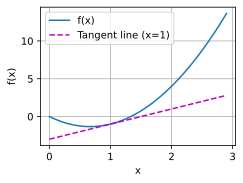

In [86]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

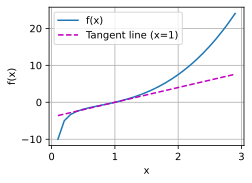

In [98]:
# Practice

def f(x):
    return x ** 3 - 1 / x

x = np.arange(0.1, 3, 0.1)
plot(x, [f(x), 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Partial derivative

## Gradient

## Chain rule

---

# 2.5 Automatic differentiation (2023.3.8)

$y=2x^Tx$

In [100]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [101]:
x.requires_grad_(True) # Same as x = torch.arange(4.0, requires_grad=True)
x.grad

In [102]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [103]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [104]:
x.grad == 4 * x

tensor([True, True, True, True])

In [105]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

---

In [107]:
x.grad.zero_()
y = x * x

y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

---

In [108]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [110]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

---

# 2.6 Probability (2023.3.9)

In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
# Law of large numbers

# Sampling

# Distribution

# Multinomial Distribution

In [3]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [4]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 0., 0., 2., 3., 4.])

In [5]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1710, 0.1650, 0.1550, 0.1610, 0.1820, 0.1660])

In [6]:
1 / 6

0.16666666666666666

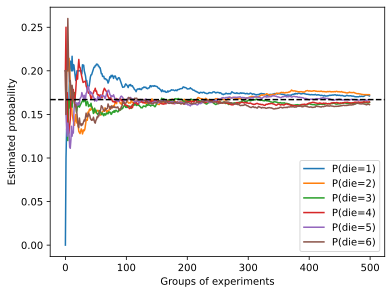

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=(f'P(die={str(i + 1)})'))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

---

# 2.7 Read documentation (2023.3.9)

## Find all functions and classes in a module

In [13]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

## Find out how to use specific function / class

In [14]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

In [15]:
torch.ones(4)

tensor([1., 1., 1., 1.])

In [18]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

In [16]:
list??

Init signature: list(iterable=(), /)
Docstring:     
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
Type:           type
Subclasses:     _HashedSeq, StackSummary, _Threads, ConvertingList, DeferredConfigList, SList, _ImmutableLineList, FormattedText, NodeList, _ExplodedList, ...

In [ ]:
# Remember to use dir(), help(), ??

In [19]:
help(torch.nn)

Help on package torch.nn in torch:

NAME
    torch.nn

PACKAGE CONTENTS
    _reduction
    backends (package)
    common_types
    cpp
    functional
    grad
    init
    intrinsic (package)
    modules (package)
    parallel (package)
    parameter
    qat (package)
    quantizable (package)
    quantized (package)
    utils (package)

FUNCTIONS
    factory_kwargs(kwargs)
        Given kwargs, returns a canonicalized dict of factory kwargs that can be directly passed
        to factory functions like torch.empty, or errors if unrecognized kwargs are present.
        
        This function makes it simple to write code like this::
        
            class MyModule(nn.Module):
                def __init__(self, **kwargs):
                    factory_kwargs = torch.nn.factory_kwargs(kwargs)
                    self.weight = Parameter(torch.empty(10, **factory_kwargs))
        
        Why should you use this function instead of just passing `kwargs` along directly?
        
        1.